Вариант 23
3.1. Используя таблицу значений $Y_i$  функции $y = f(x)$, вычисленных в точках $X_i, i = 1, ..., 3$   построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки ${X_i, Y_i}$.  Вычислить значение погрешности интерполяции в точке X*.

$f(x) = 1/x$

$X^* = 0.8$

a) $X = [0.1, 0.5, 0.9, 1.3]$

б) $X = [0.1, 0.5, 1.1, 1.3]$

In [33]:
import matplotlib.pyplot as plt
from math import factorial
import typing

def error (y_real:float, y_counted:float) -> float:
    return abs(abs(y_real) - abs(y_counted))

def f(x:float) -> float:
    return 1 / x
x_point = 0.8

def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

Check = [x for x in frange(0.01, 1.5, 0.01)]

### Лангранж

$$L_j(x)  = \sum_{i = 0}^j f_i \frac{\omega_{j+1}(x)}{(x - x_i) \omega^{'}_{j+1}(x_i)}$$
$$ \omega_n(x) = (x - x_0) .... (x - x_{n-1}) \\
\omega^{'}_{n}(x_k) = (x_k - x_0) ... (x_k - x_{k-1}) (x_k - x_{k + 1}) ... (x_k - x_{n-1}) $$

In [34]:
def omega(x_point:float, X:list) -> float:
    res = 1
    for x in X:
        res *= (x_point - x)
    return res

def omega1(x_i:float, X:list) -> float:
    res = 1
    for x in X:
        if x_i == x:
            continue
        res *= (x_i - x)
    return res

def lagarange(X:list, x_point:float, f:typing.Callable[[float], float]) -> float:
    return sum([f(x) * omega(x_point, X) / (x_point - x)  / omega1(x, X) for x in X])
def L_i(X:list, Check:list, f:typing.Callable[[float], float]) -> float:
    return [lagarange(X, x_point, f) for x_point in Check if x_point not in X]

def error2(x_point:float, X:list, Check:list, f:typing.Callable[[float], float]) -> float:
    return abs(omega(x_point, X)) * max(abs(f(x)**(len(X))) for x in Check) /factorial(len(X))

#### a

Для одной точки

In [35]:
X = [0.1, 0.5, 0.9, 1.3]
Y = [f(x) for x in X]
y_counted_2 = lagarange(X[:3], x_point, f)
y_counted_3 = lagarange(X[:4], x_point, f)
print(y_counted_2)
print(y_counted_3)

0.6666666666666667
1.0256410256410255


Отрезок

In [36]:
Check = [x for x in Check if x not in X]
y_real = 1/x_point
print(y_real)

1.25


Ошибка 

In [37]:
print(error(y_real, y_counted_2))
print(error(y_real, y_counted_3))

0.5833333333333333
0.22435897435897445


Абсолютная Погрешность 

In [38]:
print(error2(x_point, X[:3], Check, f))
print(error2(x_point, X[:4], Check, f))

3500.0
43750.0


посчитали для одной точки, теперь посичтаем для "отрезка"

In [39]:
l_3 = L_i(X[:4], Check, f)
l_2 = L_i(X[:3], Check, f)

Без масштаба

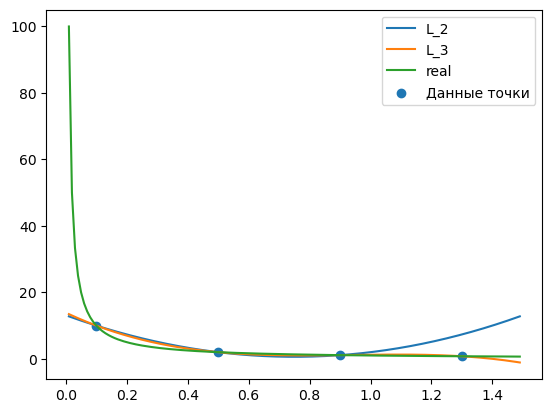

In [40]:
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.scatter(X, Y, label='Данные точки')
plt.legend()
plt.show()

С масштабом

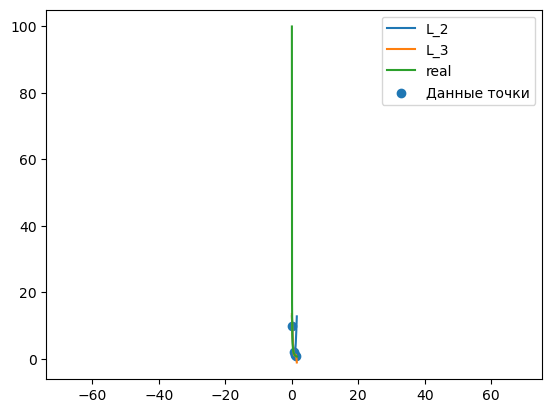

In [41]:

plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.scatter(X, Y, label='Данные точки')
plt.axis('equal')
plt.legend()
plt.show()

#### б

Для одной точки

In [42]:
X = [0.1, 0.5, 1.1, 1.3]
Y = [f(x) for x in X]
y_counted_2 = lagarange(X[:3], x_point, f)
y_counted_3 = lagarange(X[:4], x_point, f)
print(y_counted_2)
print(y_counted_3)

-0.1818181818181825
0.6993006993006989


Отрезок

In [43]:
Check = [x for x in Check if x not in X]

In [44]:
y_real = 1/x_point
print(y_real)

1.25


Ошибка

In [45]:
print(error(y_real, y_counted_2))
print(error(y_real, y_counted_3))

1.0681818181818175
0.5506993006993011


Абсолютная погрешность

In [46]:
print(error2(x_point, X[:3], Check, f))
print(error2(x_point, X[:4],Check, f))

10500.000000000005
131250.00000000006


посчитали для одной точки, теперь посичтаем для "отрезка"

In [47]:
l_3 = L_i(X[:4], Check, f)
l_2 = L_i(X[:3], Check, f)

Без масштаба

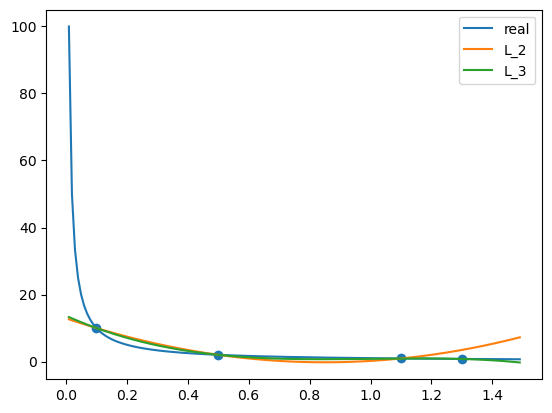

In [48]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

С масштабом

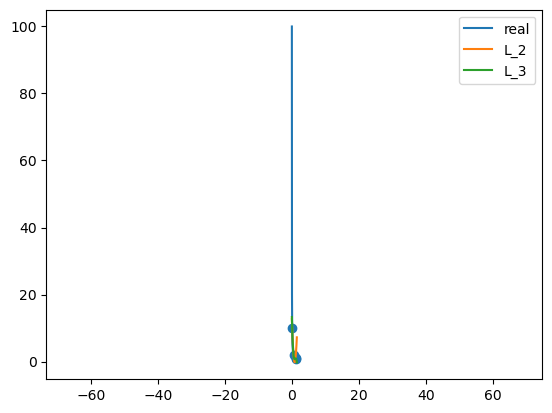

In [49]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, l_2, label='L_2')
plt.plot(Check, l_3, label='L_3')
plt.scatter(X, Y)
plt.axis('equal')
plt.legend()
plt.show()

### Ньютон

In [50]:
def compute_difference_quotient(f:typing.Callable[[float], float], xi:float, xj:float) -> float:
    return (f(xi) - f(xj)) / (xi - xj)

def compute_divided_differences(f:typing.Callable[[float], float], X:list) -> float:
    n = len(X)
    if n == 1:
        return f(X[0])
    else:
        return (compute_divided_differences(f, X[1:]) - compute_divided_differences(f, X[:-1])) / (X[-1] - X[0])

def compute_Pn(f:typing.Callable[[float], float], X:list, x:float) -> float:
    n = len(X) - 1
    if n == 0:
        return f(X[0])
    else:
        term = 1
        for j in range(n):
            term *= (x - X[j])
        return (compute_Pn(f, X[:-1], x) +
                term * compute_divided_differences(f, X))
    
def P_n(f:typing.Callable[[float], float], X:list, Check:list) -> list:
    return [compute_Pn(f, X, x_point) for x_point in Check]


#### a

Для отрезка

In [51]:
X = [0.1, 0.5, 0.9, 1.3]
Y = [f(x) for x in X]
Check = [x for x in Check if x not in X]
y_counted_2 = compute_Pn(f, X[:3], x_point)
y_counted_3 = compute_Pn(f, X[:4], x_point)
print(y_counted_2)
print(y_counted_3)


0.6666666666666661
1.025641025641025


In [52]:
y_real = 1/x_point
print(y_real)

1.25


Ошибка

In [53]:
print(error(y_real, y_counted_2))
print(error(y_real, y_counted_3))

0.5833333333333339
0.2243589743589749


Абсолютная погрешность

In [54]:
print(error2(x_point, X[:3], Check, f))
print(error2(x_point, X[:4],Check, f))

3500.0
43750.0


посчитали для одной точки, теперь посичтаем для "отрезка"

In [55]:
p_2 = P_n(f, X[:3], Check)
p_3 = P_n(f, X[:4], Check)

Без масштаба

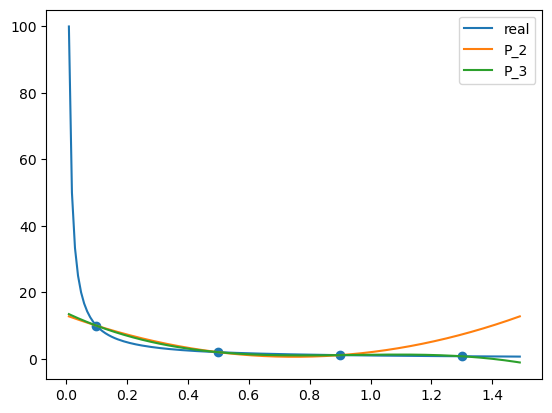

In [56]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

С масштабом

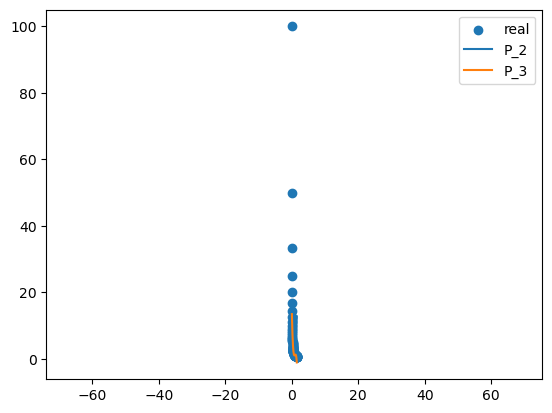

In [57]:
plt.scatter(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.axis('equal')
plt.legend()
plt.show()

#### б

In [58]:
X = [0.1, 0.5, 1.1, 1.3]
Y = [f(x) for x in X]
Check = [x for x in Check if x not in X]
y_counted_2 = compute_Pn(f, X[:3], x_point)
y_counted_3 = compute_Pn(f, X[:4], x_point)
print(y_counted_2)
print(y_counted_3)

-0.18181818181818254
0.6993006993006993


In [59]:
y_real = 1/x_point
print(y_real)

1.25


In [60]:
print(error(y_real, y_counted_2))
print(error(y_real, y_counted_3))

1.0681818181818175
0.5506993006993007


In [61]:
print(error2(x_point, X[:3], Check, f))
print(error2(x_point, X[:4],Check, f))

10500.000000000005
131250.00000000006


In [62]:
p_2 = P_n(f, X[:3], Check)
p_3 = P_n(f, X[:4], Check)

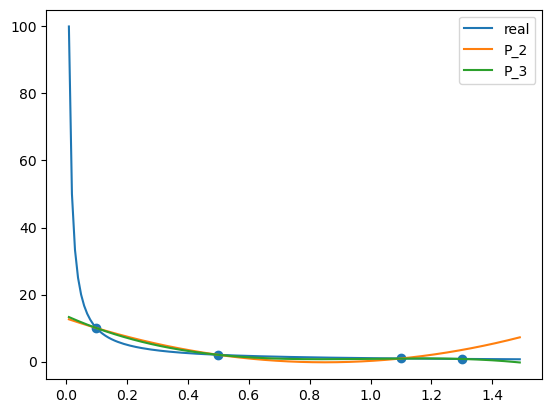

In [63]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)

plt.legend()
plt.show()

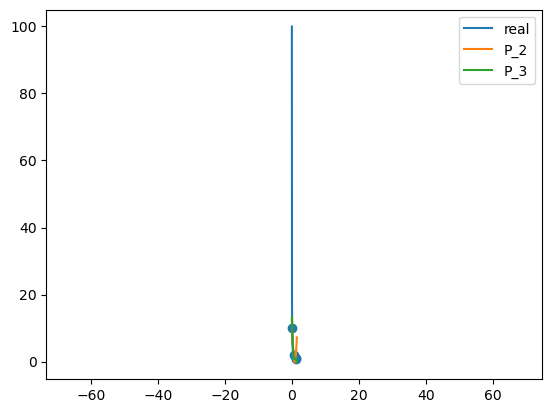

In [64]:
plt.plot(Check, [f(x) for x in Check] , label='real')
plt.plot(Check, p_2, label='P_2')
plt.plot(Check, p_3, label='P_3')
plt.scatter(X, Y)
plt.axis('equal')
plt.legend()
plt.show()